## Least squares solutions: fitting linear equations to data

#### Goal: Fitting an annual cycle:

<img src='images/annual_sst.png' width="700">


source: Emery and Thompson

#### Periodic function review

Fundamental periodic functions:
Sine and Cosine
<img src='images/periodic_fxn.png' width="500">


Vertical and Horizontal offsets:
<img src='images/per_phase_shift.png' width="500">

[source](https://www.mathsisfun.com/algebra/amplitude-period-frequency-phase-shift.html)


$y = A \sin(Bx + C) + D$

A = amplitude
period =$ \frac{2\pi}{b} $
phase shift = $\frac{-C}{B}$
vertical shift = D
##### for annual cycle
$y = c_1 \sin(\frac{2\pi}{365.25}t) + c_2 \cos(\frac{2\pi}{365.25}t) + c_3$

##### Exercises:
Write an equation for a wave:
* 2 meter amplitude
* 10 second period

<Figure size 432x288 with 0 Axes>

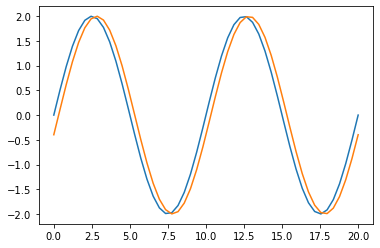

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
fig, ax = plt.subplots()
t = np.linspace(0,20)
y_1 = 2 * np.sin((2 * np.pi * t)/(10))
y_2 = 2 * np.sin((2 * np.pi * t)/(10) - (2/10))
ax.plot(t,y_1)
ax.plot(t,y_2)

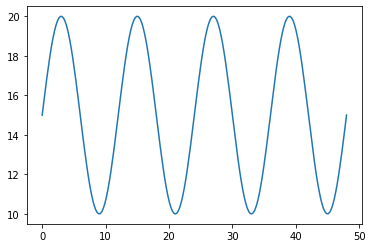

<Figure size 432x288 with 0 Axes>

In [2]:
fig, ax = plt.subplots()
mean_t = 10
amp_t = 5

plt.figure()
t = np.linspace(0,12*4,num=200)
y_1 =  5*np.sin((2 * np.pi * t)/(12)) + 15
ax.plot(t,y_1)

$T = A  sin(\frac{2 \pi t }{12 months} + \phi) + c$




### Matrix Multiplication
$\begin{bmatrix}
        a_{11} & a_{12} & a_{13} & \dots & a_{1n}\\
        a_{21} & a_{22} & a_{23}& \dots & a_{2n} \\
        a_{31} & a_{32} & a_{33} & \dots & a_{3n}\\
        \vdots & \vdots & \vdots     & \ddots & \vdots \\
        a_{m1} & a_{m2} & a_{m3} & \dots & a_{mn}\\
        \end{bmatrix}
      \begin{bmatrix}
        c_1 \\
        c_2 \\
        c_3 \\
        \vdots\\
        c_n \\
        \end{bmatrix}=
        \begin{bmatrix}
        y_1 \\
        y_2 \\
        y_3 \\
        \vdots\\
        y_m \\
        \end{bmatrix}$
        
In a system of m equations,

$c_1 a_{11} + c_2 a_{12} +c_3 a{13}+ \dots c_n a_{1n} = y_1$ 

$c_1 a_{21} + c_2 a_{22} +c_3 a{23}+ \dots c_n a_{2n} = y_2$ 

$c_1 a_{31} + c_2 a_{32} +c_3 a{33}+ \dots c_n a_{3n} = y_3$ 

$ \vdots   $

$c_1 a_{m1} + c_2 a_{m2} +c_3 a{m3}+ \dots c_n a_{mn} = y_m$ 


#### example  
- three equations
- three unknowns

$ x+y+z=6$

$  2y+5z=-4$

$2x+5y-z=27$

$ \begin{bmatrix}
    1 & 1 &1\\
    0 & 2 &5\\
    2 & 5 &1\\
    \end{bmatrix}
   \begin{bmatrix}
        x \\
        y \\
        z \\
    \end{bmatrix}
        =
   \begin{bmatrix}
        6 \\
       -4 \\
        27 \\
       \end{bmatrix}
       $
    
    
- np.linalg.solve(A,y)
- (same number of questions as unknowns)
 

#### Linear algebra review: 3 equations, 3 unknowns

[Solving a system of equations](https://www.mathsisfun.com/algebra/systems-linear-equations-matrices.html)

In [3]:
y = np.array([6,-4,27])
A = np.array([[1,1,1],
              [0,2,5],
              [2,5,-1]])
print(A)

[[ 1  1  1]
 [ 0  2  5]
 [ 2  5 -1]]


In [4]:
np.linalg.solve(A,y)

array([ 5.,  3., -2.])

In [5]:
inv_A = np.linalg.inv(A)
print('Inverse Methods:', np.dot(inv_A,y))

Inverse Methods: [ 5.  3. -2.]


#### Harmonic Analysis

<img src='images/harmonic_analysis.png' width="500">

Strub, P. T., J. S. Allen, A. Huyer, R. L. Smith, and R. C. Beardsley (1987), Seasonal cycles of currents, temperatures, winds, and sea level over the northeast Pacific continental shelf: 35°N to 48°N, J. Geophys. Res., 92(C2), 1507–1526, doi:10.1029/JC092iC02p01507.

<img src='images/harmonic_analysis_2.png' width="700">

Adriana Huyer, Patricia A. Wheeler, P. Ted Strub, Robert L. Smith, Ricardo Letelier, P. Michael Kosro, The Newport line off Oregon – Studies in the North East Pacific, Progress in Oceanography, Volume 75, Issue 2, October 2007, Pages 126-160, ISSN 0079-6611, http://dx.doi.org/10.1016/j.pocean.2007.08.003.

* Can use to remove seasonal cycle when studying interannual variability

* Often annual and semi annual harmonic as used to fit seasonal cycle

* Coefficients and phase lags can summarize difference between locations

#### Harmonic analysis: seasonal SST

##### Exercise

Use the least squares function to solve an overdetermined system of equations (more equations than unknowns).
$y=f(t)$

where y =sea surface temperature and t=time in months

$y = c_1+ c_2\sin(\frac{2\pi}{12}t) + c_3 \cos(\frac{2\pi}{12}t)$

Data: pairs of t,y
N=24 pairs of data
###### Goal
find a $c_1$, $c_2$, $c_3$ that minimizes the error between the fit and the data.

$Ac=y$

A= "design matrix" contains information about the form of the matrix you are measuring.

* N rows(1 per measurement)
* M columns(1 per coefficient)

$\begin{bmatrix}
       1 & \sin(\frac{2\pi t_1}{12}) & \cos(\frac{2\pi t_1}{12})\\
       1 & \sin(\frac{2\pi t_2}{12}) & \cos(\frac{2\pi t_2}{12}) \\
       1 & \sin(\frac{2\pi t_3}{12}) & \cos(\frac{2\pi t_3}{12})\\
        \vdots & \vdots & \vdots     \\
       1 &\sin(\frac{2\pi t_n}{12}) & \cos(\frac{2\pi t_n}{12})\\
        \end{bmatrix}
        \begin{bmatrix}
        c_1 \\
        c_2 \\
        c_3 \\
        \end{bmatrix}=
        \begin{bmatrix}
        y_1 \\
        y_2 \\
        y_3 \\
        \vdots\\
        y_m \\
        \end{bmatrix}
        $


- 24 equations 3 unknowns

#### process for coding in python
1). create t and y vectors

2). create design matrix A

3). solve for c_1, c_2, c_3 using: 

c=np.linalg.lstsq(A,y)

4).plot fit on top of data

In [6]:
import numpy as np
sst = np.array([7.6,7.4,8.2,9.2,10.2,11.5,12.4,13.4,13.7,11.8,10.1,9.0,8.9,9.5,10.6,11.4,12.9,12.7,13.9,14.2,13.5,11.4,10.9,8.1])
t = np.arange(1,25,1)

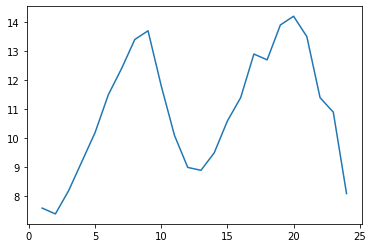

In [7]:
fig, ax = plt.subplots()
ax.plot(t,sst)